In [1]:
# Import Library
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import splitfolders

In [15]:
import zipfile

local_zip = 'D://UMM/Semester 7//ML//Modul6//nyoba//rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r') # Membaca local path
zip_ref.extractall('D://UMM/Semester 7//ML//Modul6//nyoba') # Extract .zip file
zip_ref.close()

In [20]:
# Split the dataset into training, validation, and test sets
splitfolders.ratio('D://UMM//Semester 7//ML//Modul6//nyoba//rps', output="D://UMM//Semester 7//ML//Modul6//nyoba//rps//rockpaperscissors", seed=1337, ratio=(0.7, 0.25, 0.05))

Copying files: 2520 files [00:17, 142.86 files/s]


In [21]:
# Path ke direktori utama
main_directory = "nyoba/rps/rockpaperscissors"

train_directory= os.path.join(main_directory, 'train')
valid_directory = os.path.join(main_directory, 'val')
test_directory = os.path.join(main_directory, 'test')

In [12]:
import shutil
import random

label_directories = os.listdir(main_directory)

for label_dir in label_directories:
    # Path ke direktori label
    label_path = os.path.join(main_directory, label_dir)
    
    # Daftar file gambar dalam direktori label
    image_files = os.listdir(label_path)
    
    # Jumlah file gambar
    num_images = len(image_files)
    
    # Jumlah file gambar untuk setiap split
    num_train = int(num_images * 0.7)
    num_test = int(num_images * 0.05)
    num_valid = int(num_images * 0.25)
    
    # Acak urutan file gambar
    random.shuffle(image_files)
    
    # Pisahkan file gambar ke dalam folder train, test, dan valid
    train_files = image_files[:num_train]
    valid_files = image_files[num_train:num_train + num_valid]
    test_files = image_files[num_train + num_valid:]

    
    # Path ke direktori train, test, dan valid untuk label tertentu
    train_label_dir = os.path.join(train_directory, label_dir)
    test_label_dir = os.path.join(test_directory, label_dir)
    valid_label_dir = os.path.join(valid_directory, label_dir)
    
    # Buat direktori baru jika belum ada
    os.makedirs(train_label_dir, exist_ok=True)
    os.makedirs(test_label_dir, exist_ok=True)
    os.makedirs(valid_label_dir, exist_ok=True)
    
    # Pindahkan file gambar ke direktori train
    for file in train_files:
        src_path = os.path.join(label_path, file)
        dest_path = os.path.join(train_label_dir, file)
        shutil.copy(src_path, dest_path)
    
    # Pindahkan file gambar ke direktori test
    for file in test_files:
        src_path = os.path.join(label_path, file)
        dest_path = os.path.join(test_label_dir, file)
        shutil.copy(src_path, dest_path)
    
    # Pindahkan file gambar ke direktori valid
    for file in valid_files:
        src_path = os.path.join(label_path, file)
        dest_path = os.path.join(valid_label_dir, file)
        shutil.copy(src_path, dest_path)

(-0.5, 299.5, 299.5, -0.5)

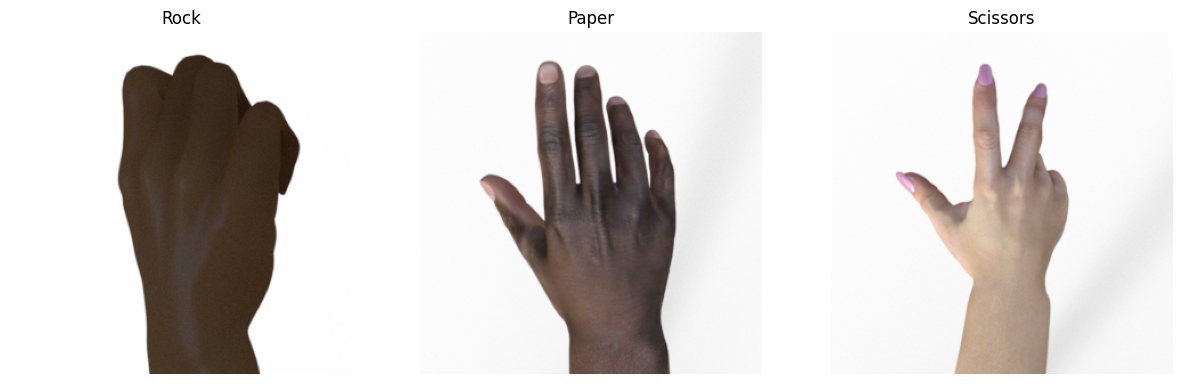

In [14]:
import random
from tensorflow.keras.preprocessing.image import load_img

# Membuat plot dengan dua kolom subplot yang berada dalam satu baris
fig, ax = plt.subplots(1, 3, figsize=(15, 10)) # figsize() untuk set ukurang gambar

sample_rock = random.choice(os.listdir(train_directory+ "/rock")) # library random digunakan untuk memilih data secara acak
image = load_img(train_directory+ "/rock/" + sample_rock) # library load_img digunakan untuk memuat gambar dengan path yang sudah ditentukan
# set gambar untuk kolom pertama (index 0)
ax[0].imshow(image)
ax[0].set_title("Rock")
ax[0].axis("Off")

sample_paper = random.choice(os.listdir(train_directory+ "/paper"))
image = load_img(train_directory+ "/paper/" + sample_paper)
# set gambar untuk kolom kedua (index 1)
ax[1].imshow(image)
ax[1].set_title("Paper")
ax[1].axis("Off")

sample_scissors = random.choice(os.listdir(train_directory+ "/scissors"))
image = load_img(train_directory+ "/scissors/" + sample_scissors)
# set gambar untuk kolom kedua (index 1)
ax[2].imshow(image)
ax[2].set_title("Scissors")
ax[2].axis("Off")

In [27]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen     = ImageDataGenerator(
                    rescale=1./255,        # Rescaling image menjadi 1./255
                    rotation_range=30,     # Rotasi image ±30° secara random
                    zoom_range=0.2,        # Perbesar image kisaran 20%
                    horizontal_flip=True,  # Flip image secara horizontal
                    fill_mode='nearest')

# implement ImageDataGenerator in train data
train_gen = train_datagen.flow_from_directory(train_directory, #Direktori data
                                             target_size=(150, 150), #Target size image
                                             shuffle = True, #Menerapkan pengacakan pada image
                                             batch_size=32, #Menerapkan batch size
                                             class_mode='categorical') #Menerapkan mode kelas

Found 1764 images belonging to 3 classes.


In [28]:
valid_datagen           = ImageDataGenerator(rescale = 1./255, validation_split=0.5)
val_gen = valid_datagen.flow_from_directory(valid_directory,
                                           target_size=(150, 150),
                                           batch_size=32,
                                           class_mode='categorical')

print('Batches train=%d, validation=%d' % (len(train_gen), len(val_gen)))

Found 630 images belonging to 3 classes.
Batches train=56, validation=20


In [29]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.applications import MobileNetV2

In [39]:
# Kita load model ResNet101, kemudian kita potong bagian Top atau Fully Connected Layernya
baseModel =  tf.keras.applications.EfficientNetV2B0(
                      weights="imagenet",  # Load weights pre-trained on ImageNet.
                      input_tensor=Input(shape=(150, 150, 3)), # Set Input Model dengan shape yang sesuai dengan ukuran citra
                      include_top=False,
                      )

24274472/24274472 [==============================] - 28s 1us/step


In [40]:
# Model Summary
baseModel.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 150, 150, 3)          0         ['input_3[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 150, 150, 3)          0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2D)          (None, 75, 75, 32)           864       ['normalizatio

In [41]:
# Freeze the baseModel karena sudah dilakukan training
baseModel.trainable = False

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dropout, Flatten, Dense, Activation, GlobalAveragePooling2D

model=Sequential()
model.add(baseModel)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(3,activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b0 (Functio  (None, 5, 5, 1280)        5919312   
 nal)                                                            
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_4 (Dropout)         (None, 1280)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)              1311744   
                                                                 
 activation_4 (Activation)   (None, 1024)              0         
                                                                 
 dropout_5 (Dropout)         (None, 1024)             

In [43]:
# Complie Model
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',optimizer = 'Adamax', metrics= ['accuracy'])


In [44]:
# training Transfer Learning Model ResNet101
history = model.fit(
    train_gen,
    epochs = 10,
    validation_data = val_gen,
)

Epoch 1/10
56/56 [==============================] - 44s 649ms/step - loss: 1.1480 - accuracy: 0.3583 - val_loss: 1.1030 - val_accuracy: 0.3333
Epoch 2/10
56/56 [==============================] - 36s 648ms/step - loss: 1.1260 - accuracy: 0.3418 - val_loss: 1.0966 - val_accuracy: 0.3333
Epoch 3/10
56/56 [==============================] - 33s 597ms/step - loss: 1.1201 - accuracy: 0.3481 - val_loss: 1.0958 - val_accuracy: 0.3333
Epoch 4/10
56/56 [==============================] - 34s 606ms/step - loss: 1.1031 - accuracy: 0.3515 - val_loss: 1.0957 - val_accuracy: 0.3333
Epoch 5/10
56/56 [==============================] - 34s 613ms/step - loss: 1.1050 - accuracy: 0.3605 - val_loss: 1.0954 - val_accuracy: 0.3333
Epoch 6/10
56/56 [==============================] - 33s 594ms/step - loss: 1.1041 - accuracy: 0.3481 - val_loss: 1.0909 - val_accuracy: 0.3619
Epoch 7/10
56/56 [==============================] - 34s 602ms/step - loss: 1.1016 - accuracy: 0.3498 - val_loss: 1.0933 - val_accuracy: 0.4333

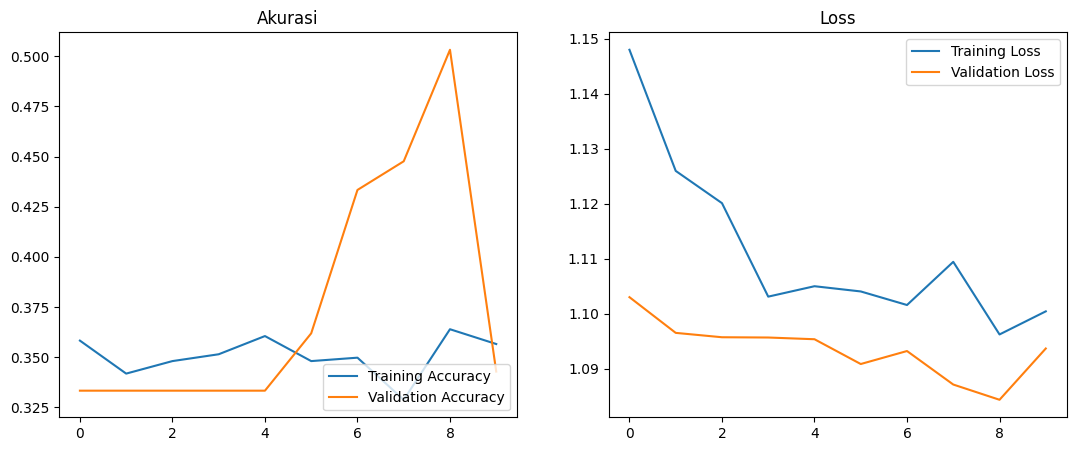

In [46]:
# Visualization Accuracy, Val Accuracy, Loss and Val Loss
acc = history.history['accuracy']  
val_acc = history.history['val_accuracy']  
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Akurasi')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [47]:
# Printout Accuracy and Loss
loss, accuracy = model.evaluate_generator(val_gen)
print("Validation: \nAccuracy = %f  \nLoss = %f " % (accuracy, loss))

C:\Users\fikri\AppData\Local\Temp\ipykernel_11256\837615051.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, accuracy = model.evaluate_generator(val_gen)


Validation: 
Accuracy = 0.342857  
Loss = 1.093712 


In [48]:
# Showing Classification Report
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predictting Model
y_pred =  model.predict_generator(val_gen)
y_pred = np.argmax(y_pred, axis=1)
target_names = ['paper', 'rock', 'scissors']  # Sesuaikan dengan kelas yang ada dalam model Anda

# Classification Report
print('Classification Report')
print(classification_report(val_gen.classes, y_pred, target_names=target_names))

C:\Users\fikri\AppData\Local\Temp\ipykernel_11256\3098666644.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred =  model.predict_generator(val_gen)


Classification Report
              precision    recall  f1-score   support

       paper       0.00      0.00      0.00       210
        rock       0.33      0.98      0.49       210
    scissors       0.00      0.00      0.00       210

    accuracy                           0.33       630
   macro avg       0.11      0.33      0.16       630
weighted avg       0.11      0.33      0.16       630



c:\Users\fikri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\fikri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\fikri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,